In [16]:
import sys
sys.path.append('./../../')
from rl.a2c.a2c import get_a2c_model
from stable_baselines3.common.evaluation import evaluate_policy
import matplotlib.pyplot as plt
import pickle

In [2]:
model = get_a2c_model()

In [6]:
# Evaluate the initial random policy
mean_reward, std_reward = evaluate_policy(model, model.env, n_eval_episodes=100)
print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

C:\Users\Patryk\AppData\Local\Programs\Python\Python39\lib\site-packages\stable_baselines3\common\evaluation.py:65: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


mean_reward:297.15 +/- 131.88


In [23]:
# Train
rewards = []
stds = []
for i in range(100):
    print("iteration: ", i+1)
    model.learn(total_timesteps=10)
    mean_reward, std_reward = evaluate_policy(model, model.env, n_eval_episodes=1)
    print(f"   mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")
    
    rewards.append(mean_reward)
    stds.append(std_reward)
    
    with open("a2c_reward.txt", "wb") as f:   
        pickle.dump(rewards, f)
    with open("a2c_std.txt", "wb") as f:   
        pickle.dump(stds, f)
print("   saving...")
model.save("a2c_achtung")

iteration:  1


C:\Users\Patryk\AppData\Local\Programs\Python\Python39\lib\site-packages\stable_baselines3\common\evaluation.py:65: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


   mean_reward:90.00 +/- 0.00
iteration:  2
   mean_reward:190.00 +/- 0.00
iteration:  3
   mean_reward:330.00 +/- 0.00
iteration:  4
   mean_reward:165.00 +/- 0.00
iteration:  5
   mean_reward:480.00 +/- 0.00
iteration:  6
   mean_reward:290.00 +/- 0.00
iteration:  7
   mean_reward:145.00 +/- 0.00
iteration:  8
   mean_reward:320.00 +/- 0.00
iteration:  9
   mean_reward:355.00 +/- 0.00
iteration:  10
   mean_reward:195.00 +/- 0.00
iteration:  11
   mean_reward:185.00 +/- 0.00
iteration:  12
   mean_reward:415.00 +/- 0.00
iteration:  13
   mean_reward:200.00 +/- 0.00
iteration:  14
   mean_reward:95.00 +/- 0.00
iteration:  15
   mean_reward:635.00 +/- 0.00
iteration:  16
   mean_reward:310.00 +/- 0.00
iteration:  17
   mean_reward:165.00 +/- 0.00
iteration:  18
   mean_reward:415.00 +/- 0.00
iteration:  19
   mean_reward:200.00 +/- 0.00
iteration:  20
   mean_reward:135.00 +/- 0.00
iteration:  21
   mean_reward:110.00 +/- 0.00
iteration:  22
   mean_reward:505.00 +/- 0.00
iteration:  2

In [11]:
# Evaluate the trained policy
model.load("a2c_achtung")
mean_reward, std_reward = evaluate_policy(model, model.env, n_eval_episodes=100)
print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

C:\Users\Patryk\AppData\Local\Programs\Python\Python39\lib\site-packages\stable_baselines3\common\evaluation.py:65: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


mean_reward:287.55 +/- 120.62


Text(0.5, 1.0, 'advantage actor critic')

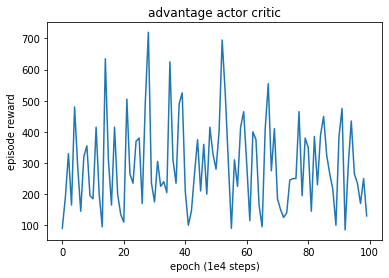

In [24]:
plt.plot(rewards)
plt.xlabel('epoch (1e4 steps)')
plt.ylabel('episode reward')
plt.title('advantage actor critic')

Text(0.5, 1.0, 'advantage actor critic')

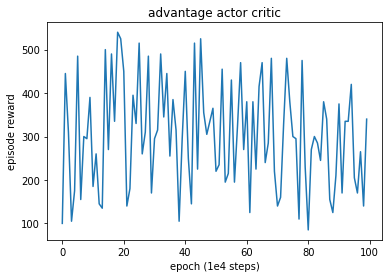

In [22]:
plt.plot(rewards)
plt.xlabel('epoch (1e4 steps)')
plt.ylabel('episode reward')
plt.title('advantage actor critic')